<a href="https://colab.research.google.com/github/DongUk-Park/RnD/blob/main/POI/NAIS/RegionEmbedding_DataPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지역임베딩 생성
아래 가로길이 : 64.39Km
세로길이 : 42.53
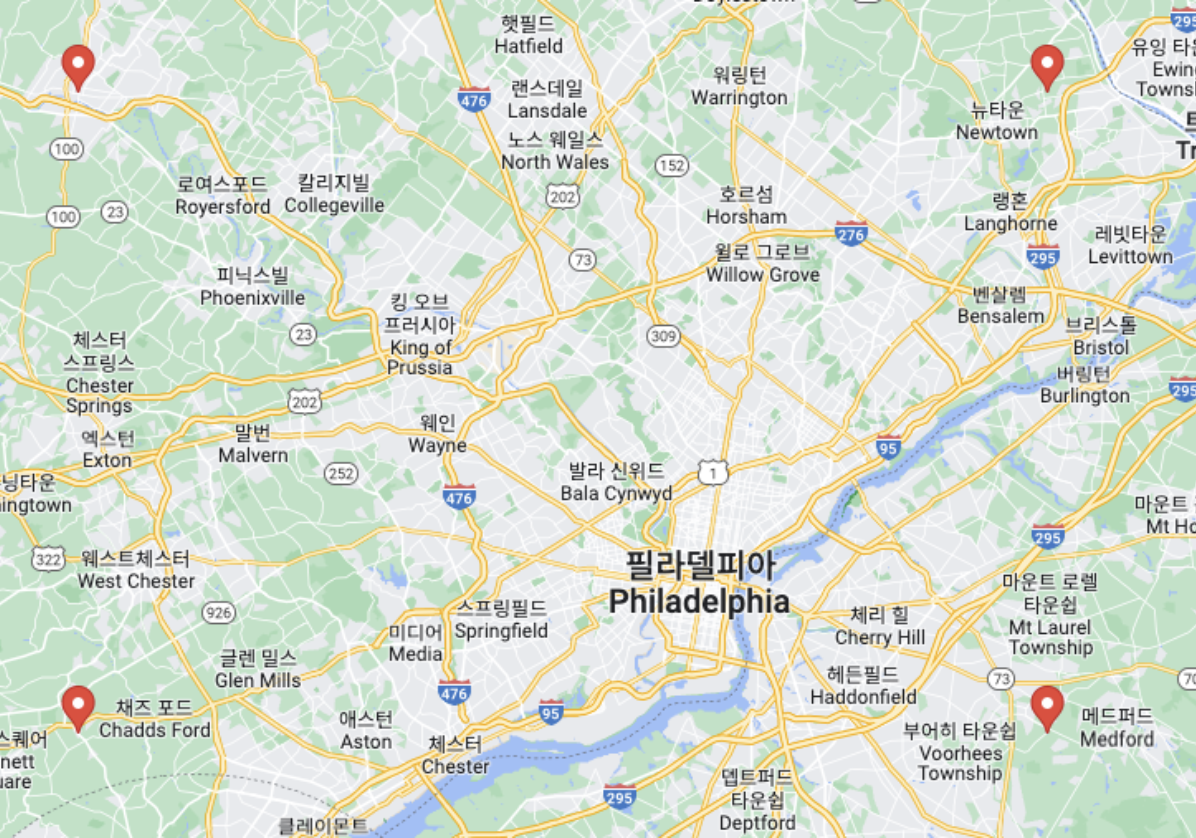

In [30]:
import pandas as pd
import csv
import torch

In [28]:
input_file = '/content/poi_region.txt'

# CSV 파일을 읽고 데이터를 리스트로 저장
data = []
with open(input_file, 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    #data.append(header)
    for row in csv_reader:
        row = [int(row[0]), int(row[1])]
        data.append(row)
print(data[:10])

[[0, 29301], [1, 15777], [2, 18353], [3, 10625], [4, 15133], [5, 15777], [6, 32521], [7, 17065], [8, 15455], [9, 2253]]


In [29]:
output_file = '/content/poi_region_sorted.txt'

# business_id 기준으로 데이터를 정렬
data.sort(key=lambda x: x[1])  # 여기서 0은 user_id 열을 가리킵니다. 0부터 시작하면 첫 번째 열입니다.
print(data[:10])

# business_id 정수형으로 변환
idx = 0
before_business_id = data[0][1]
new_data = []
for i in data:
  if i[1] == before_business_id:
    new_data.append([i[0], idx])
  else:
    idx += 1
    before_business_id = i[1]
    new_data.append([i[0], idx])

print(new_data[:10])
print(new_data[-10:])
new_data.sort(key=lambda x: x[0])  # 여기서 0은 user_id 열을 가리킵니다. 0부터 시작하면 첫 번째 열입니다.
print(new_data[:10])


# 정렬된 데이터를 새로운 파일에 저장
with open(output_file, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter='\t')
    csv_writer.writerows(new_data)

print("CSV 파일이 user_id를 기준으로 정렬되었고, 새로운 파일에 저장되었습니다.")

[[4838, 321], [5931, 321], [7583, 321], [13575, 321], [9998, 965], [93, 1609], [114, 1609], [4225, 1609], [5541, 1609], [7063, 1609]]
[[4838, 0], [5931, 0], [7583, 0], [13575, 0], [9998, 1], [93, 2], [114, 2], [4225, 2], [5541, 2], [7063, 2]]
[[13640, 145], [1118, 146], [6998, 146], [7951, 146], [12039, 146], [13691, 147], [3147, 148], [14067, 149], [8409, 150], [1226, 151]]
[[0, 87], [1, 45], [2, 53], [3, 29], [4, 43], [5, 45], [6, 97], [7, 49], [8, 44], [9, 4]]
CSV 파일이 user_id를 기준으로 정렬되었고, 새로운 파일에 저장되었습니다.


In [30]:
with open("/content/poi_region_sorted.txt", 'r') as file:
            # 모든 행을 읽어와서 첫 번째 열만 리스트로 변환
            businessRegionEmbedList = [int(line.split('\t')[1].strip()) for line in file.readlines()]

print(len(businessRegionEmbedList),businessRegionEmbedList)

14586 [87, 45, 53, 29, 43, 45, 97, 49, 44, 4, 58, 46, 39, 47, 23, 113, 41, 30, 23, 49, 48, 43, 45, 46, 39, 38, 3, 46, 41, 45, 51, 46, 45, 50, 31, 45, 51, 46, 46, 44, 44, 44, 44, 44, 47, 78, 114, 31, 86, 31, 45, 48, 49, 60, 59, 39, 44, 46, 49, 52, 48, 56, 55, 82, 37, 44, 42, 60, 25, 98, 46, 102, 91, 65, 29, 49, 60, 57, 35, 38, 41, 55, 58, 97, 36, 53, 44, 62, 52, 96, 60, 44, 45, 2, 113, 39, 71, 128, 38, 60, 39, 37, 26, 116, 95, 40, 77, 44, 118, 43, 47, 44, 94, 4, 2, 97, 61, 94, 40, 44, 90, 45, 43, 32, 36, 48, 38, 130, 57, 60, 53, 60, 44, 45, 44, 41, 104, 43, 33, 40, 57, 76, 26, 45, 86, 47, 47, 108, 75, 42, 47, 43, 33, 95, 35, 84, 66, 38, 46, 47, 44, 128, 51, 43, 32, 44, 57, 90, 45, 114, 44, 59, 88, 55, 42, 35, 43, 46, 46, 91, 53, 55, 47, 79, 42, 37, 91, 58, 89, 38, 61, 29, 72, 49, 64, 60, 44, 43, 56, 43, 46, 49, 49, 65, 43, 26, 53, 38, 98, 103, 23, 42, 42, 41, 116, 46, 139, 37, 67, 28, 23, 64, 43, 30, 43, 64, 40, 33, 69, 44, 45, 47, 111, 103, 44, 43, 69, 42, 45, 43, 112, 109, 45, 36, 50,

In [33]:
import torch
import torch.nn
import math

history = [[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123],[1,5,123]]
target = [1, 21, 31, 41, 51, 5, 55, 66, 77, 88, 123, 121, 1345, 1111, 2556]


In [25]:
def read_poi_coos(poi_file):
    poi_coos = {}
    poi_data = open(poi_file, 'r').readlines()
    for eachline in poi_data:
        lid, lat, lng = eachline.strip().split()
        lid, lat, lng = int(lid), float(lat), float(lng)
        poi_coos[lid] = (lat, lng)
    return poi_coos
def dist(loc1, loc2):
    lat1, long1 = loc1[0], loc1[1]
    lat2, long2 = loc2[0], loc2[1]
    if abs(lat1 - lat2) < 1e-6 and abs(long1 - long2) < 1e-6:
        return 0.0
    degrees_to_radians = math.pi/180.0
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
           math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )
    earth_radius = 6371
    return arc * earth_radius
poi_coos = read_poi_coos('/content/Yelp_poi_coos.txt')

In [26]:
result = [(poi_coos[i][0], poi_coos[i][1]) for i in target]

print(result[0])
print(len(result))

(39.9525839, -75.1652215)
15


In [27]:
history_pois = [(poi_coos[i][0], poi_coos[i][1]) for i in history[0]]
target_pois = [(poi_coos[i][0], poi_coos[i][1]) for i in target]

target_dist = []
for poi1 in target_pois:
    avg = 0
    for poi2 in history_pois:
        avg += dist(poi1, poi2)
    avg /= len(history_pois)
    target_dist.append(avg)

In [29]:
print(target_dist)
print(len(target_dist))

[1.4900060717489616, 3.997112524357753, 1.5610914948585164, 1.4603818729244675, 5.565096282085125, 1.7127611208553877, 1.8341650382041743, 1.645474920018529, 3.5293790100585376, 3.1373222331669375, 1.9469153797017966, 1.9842557699051204, 1.846558070029604, 1.4738448770286368, 13.811843051073756]
15
